In [91]:
# ! pip install lightgbm

## Import Libraries

In [92]:
#import libraries yg dibutuhkan
import pandas as pd #memanggil pandas sebagai pd
import matplotlib.pyplot as plt # memanggil matplotlib sebagai plt
import numpy as np #memanggil numpy sebagai np
import seaborn as sns #memanggil seaborn sebagai sns

from sklearn.model_selection import train_test_split #memanggil train_test dari sklearn model
from feature_engine.outliers import Winsorizer #memanggil winsorizer dari feature engine
from scipy.stats import kendalltau, pearsonr #memanggil kendalltau dan pearsonr dari scipy.stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler  #mamanggil minmaxscaler dari sklearn processing
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder #memanggil model encode onehotencoder dari sklearn processing
# from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score #memanggil classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score dari sklearn.metrics 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve #memanggil GridSearchCV, cross_val_score, StratifiedKFold, learning_curve dari from sklearn.model_selection
from sklearn.utils import shuffle #memanggil shuffle dari sklearn.utils
from sklearn.compose import ColumnTransformer, make_column_selector as selector #Memanggil ColumnTransformer, make_column_selector dari sklearn.compose sebagai selector
from sklearn.pipeline import Pipeline #Memanggil Pipeline dari sklearn.pipelin
from sklearn.linear_model import LogisticRegression #Memanggil LogisticRegression dari sklearn.linear_model
from sklearn.neighbors import KNeighborsClassifier #Memanggil  KNeighborsClassifier dari sklearn.neighbors

from sklearn.svm import SVC #Memanggil  SVC dari sklearn.svm
# from catboost import CatBoostClassifier
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

In [93]:
# set max column with to none
pd.set_option('display.max_columns', None)

## Import Dataset

In [94]:
df = pd.read_csv('../datasets/clean_data_fix.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.2       1291 non-null   int64  
 1   Unnamed: 0.1       1291 non-null   int64  
 2   Unnamed: 0         1291 non-null   int64  
 3   Judul              1291 non-null   object 
 4   Harga              1291 non-null   float64
 5   Lokasi             1291 non-null   object 
 6   Hyperlink          1291 non-null   object 
 7   Img_Hyperlink      1291 non-null   object 
 8   Kamar Tidur        1291 non-null   float64
 9   Kamar Mandi        1291 non-null   float64
 10  Luas Tanah         1291 non-null   int64  
 11  Luas Bangunan      1291 non-null   int64  
 12  Sertifikat         1291 non-null   object 
 13  Daya Listrik       1291 non-null   int64  
 14  Kondisi Perabotan  1163 non-null   object 
dtypes: float64(3), int64(6), object(6)
memory usage: 151.4+ KB


In [95]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique
0,Judul,1291
1,Lokasi,7
2,Hyperlink,1289
3,Img_Hyperlink,1289
4,Sertifikat,3
5,Kondisi Perabotan,4


In [96]:
#drop column high cardinality
df.drop(['Judul','Hyperlink','Img_Hyperlink'], axis=1, inplace=True)

In [97]:
pd.set_option('display.max_colwidth', None)

cat_cols = (df.select_dtypes(include=['int64', 'float64']).columns)

listItem = []
for col in cat_cols:
    listItem.append([col, df[col].nunique()])

result_df = pd.DataFrame(listItem, columns=['nama kolom', 'jumlah nilai unique'])
result_df


,nama kolom,jumlah nilai unique
0,Unnamed: 0.2,1291
1,Unnamed: 0.1,1291
2,Unnamed: 0,1291
3,Harga,241
4,Kamar Tidur,15
5,Kamar Mandi,13
6,Luas Tanah,256
7,Luas Bangunan,206
8,Daya Listrik,20


In [98]:
df.drop(['Unnamed: 0.1','Unnamed: 0', 'Unnamed: 0.2'], axis=1, inplace=True)

In [99]:
# check sum for each Lokasi
df['Lokasi'].value_counts()

Lokasi
Balikpapan Selatan    564
Balikpapan Utara      371
Balikpapan Tengah     117
Balikpapan Baru       109
Balikpapan Timur       60
Balikpapan Kota        56
Balikpapan Barat       14
Name: count, dtype: int64

In [100]:
# get Balikpapan Selatan and Balikpapan Baru
df = df[(df['Lokasi'] == 'Balikpapan Selatan')]

## Split 

In [101]:
X = df.drop(['Harga'], axis = 1)
y = df['Harga']
X

,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Kondisi Perabotan
0,Balikpapan Selatan,5.0,3.0,144,207,SHM - Sertifikat Hak Milik,4400,Semi Furnished
11,Balikpapan Selatan,2.0,1.0,93,57,HGB - Hak Guna Bangunan,1300,Unfurnished
14,Balikpapan Selatan,3.0,3.0,500,350,SHM - Sertifikat Hak Milik,5500,Unknown
16,Balikpapan Selatan,3.0,2.0,150,120,SHM - Sertifikat Hak Milik,2200,NaN
19,Balikpapan Selatan,3.0,2.0,150,100,SHM - Sertifikat Hak Milik,2200,NaN
...,...,...,...,...,...,...,...,...
1281,Balikpapan Selatan,2.0,1.0,84,42,HGB - Hak Guna Bangunan,1300,Furnished
1282,Balikpapan Selatan,3.0,2.0,90,50,HGB - Hak Guna Bangunan,2200,Unknown
1283,Balikpapan Selatan,4.0,3.0,180,200,SHM - Sertifikat Hak Milik,2200,Unknown
1284,Balikpapan Selatan,2.0,1.0,72,48,SHM - Sertifikat Hak Milik,1300,Unknown


## Splitting between Train-Set and Test-set

In [102]:
#Splitting between train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('x Train Size: ', X_train.shape)
print('x Test Size: ', X_test.shape)
print('y Train Size: ', y_train.shape)
print('y Test Size: ', y_test.shape)

x Train Size:  (451, 8)
x Test Size:  (113, 8)
y Train Size:  (451,)
y Test Size:  (113,)


In [103]:
num_cols = (X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, X_train[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)


,nama kolom,nilai skewness
0,Kamar Tidur,7.218025
1,Kamar Mandi,3.357063
2,Luas Tanah,3.160479
3,Luas Bangunan,4.354717
4,Daya Listrik,3.722329


In [104]:
# First, capping the normal distribution

winsoriser_age = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1,
                            variables=['Kamar Tidur','Kamar Mandi','Luas Tanah','Luas Bangunan','Daya Listrik'],
                            missing_values='ignore')

X_train_capped = winsoriser_age.fit_transform(X_train)
X_test_capped = winsoriser_age.transform(X_test)

In [105]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Kamar Tidur - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


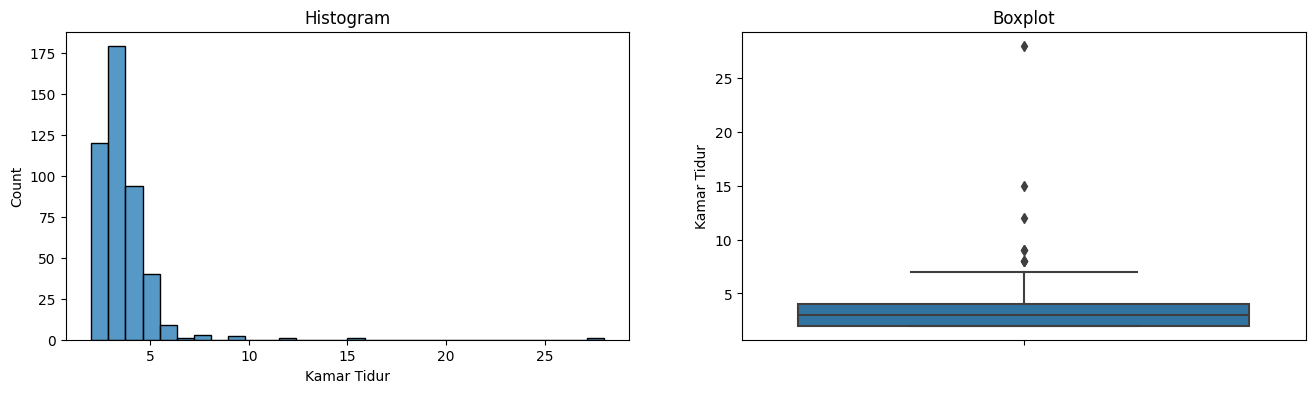


Kamar Tidur - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


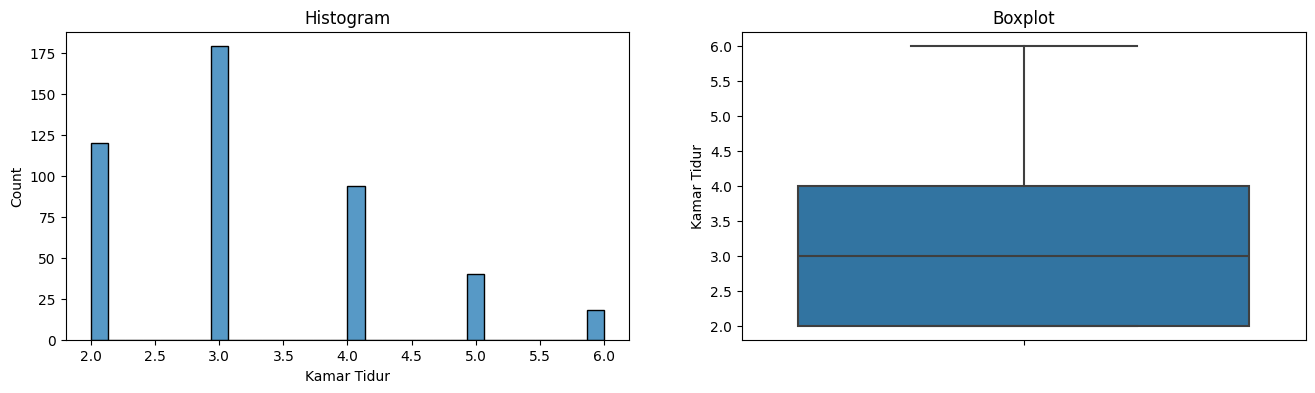

Kamar Mandi - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


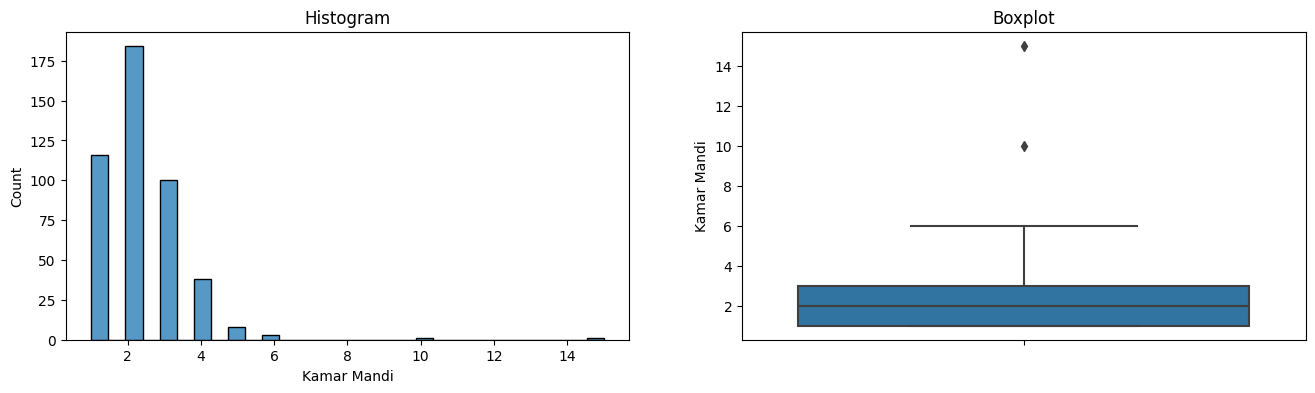


Kamar Mandi - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


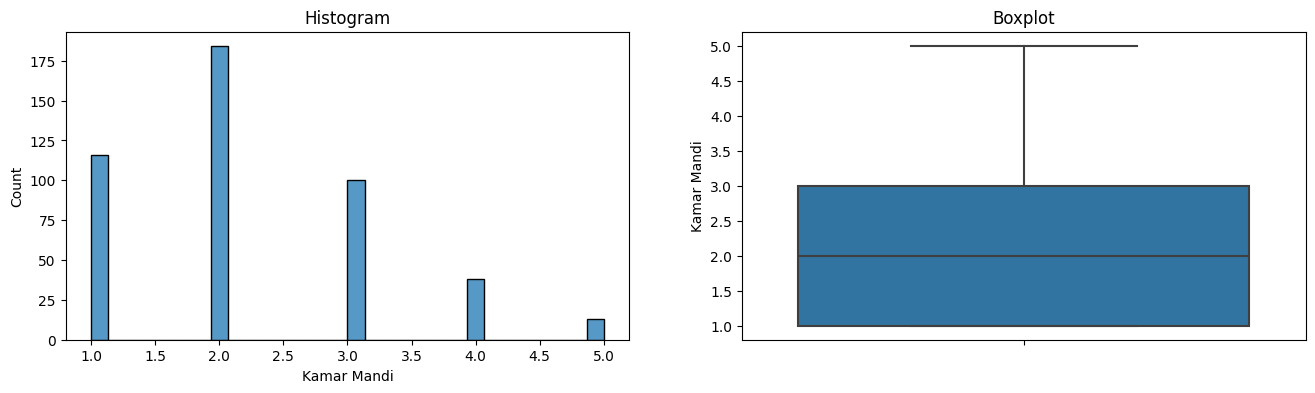

Luas Tanah - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


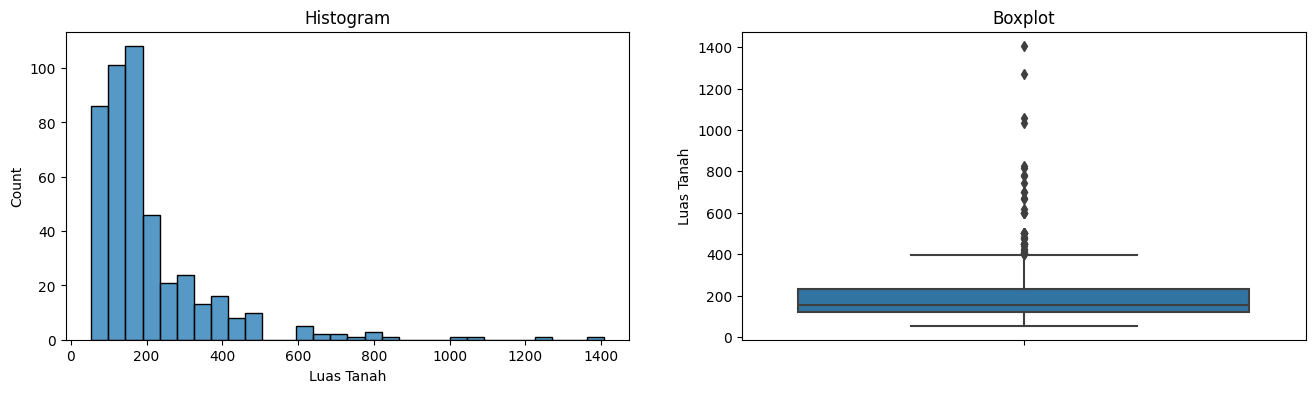


Luas Tanah - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


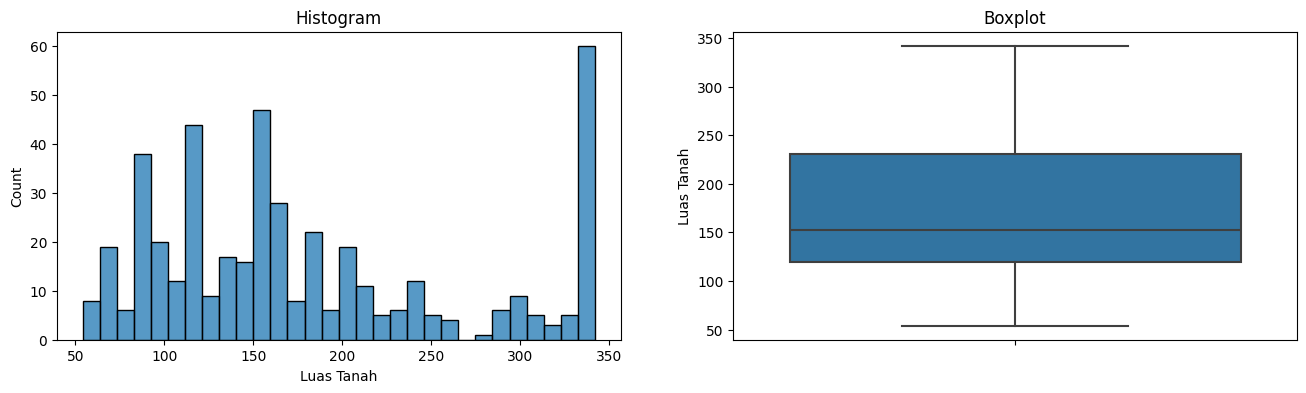

Luas Bangunan - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


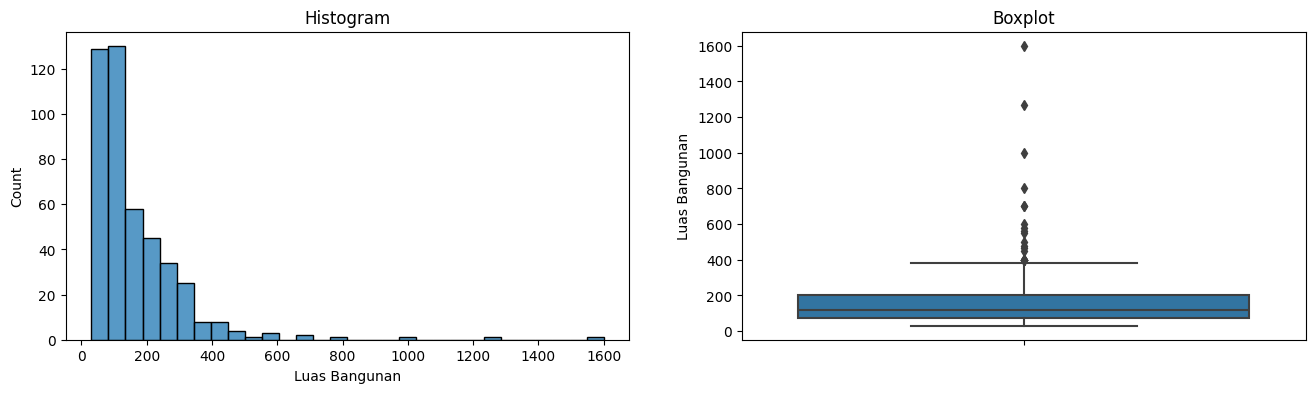


Luas Bangunan - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


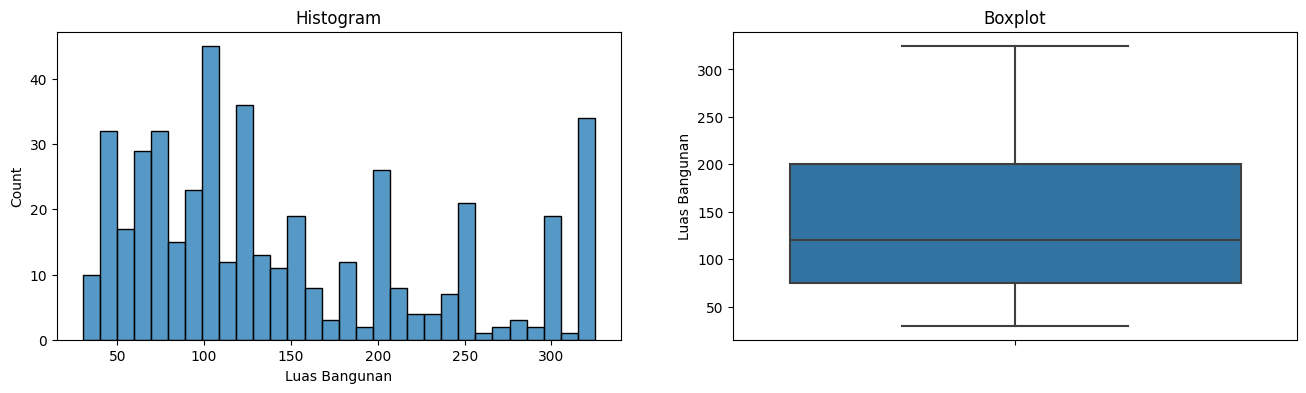

Daya Listrik - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


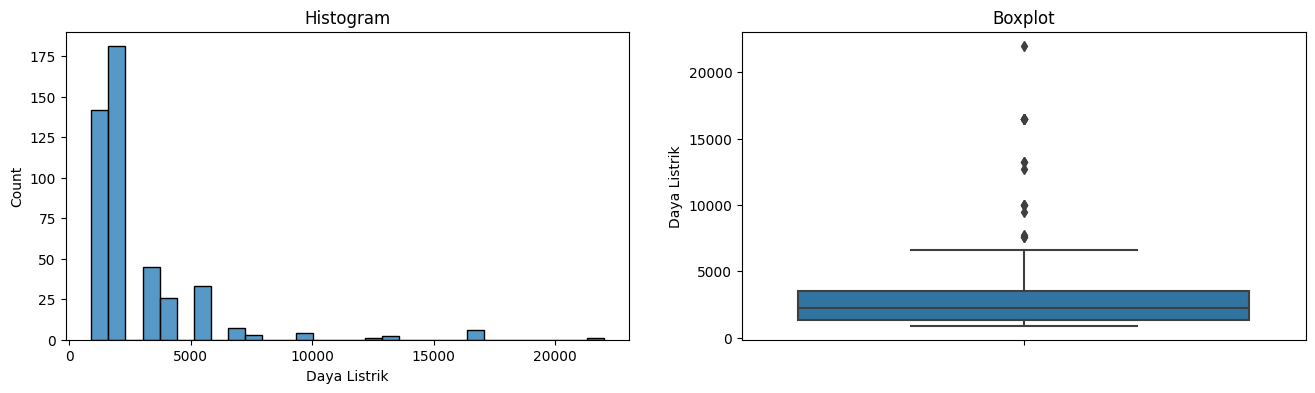


Daya Listrik - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


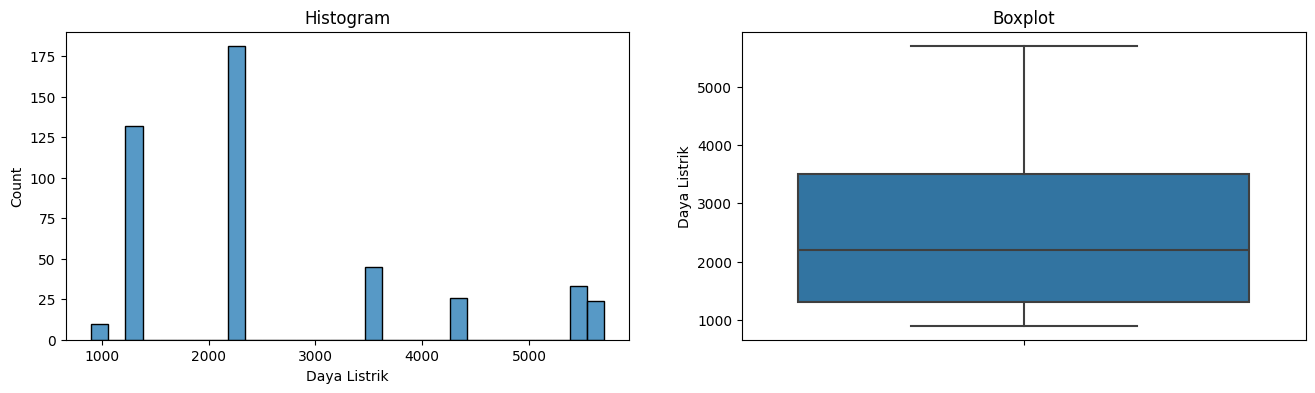

In [106]:
# Check the distribution before and after capping
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

In [107]:
X_test.isnull().sum()

Lokasi                0
Kamar Tidur           0
Kamar Mandi           0
Luas Tanah            0
Luas Bangunan         0
Sertifikat            0
Daya Listrik          0
Kondisi Perabotan    16
dtype: int64

In [108]:
y_train.isnull().sum()

0

In [109]:
X_train

,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Kondisi Perabotan
1144,Balikpapan Selatan,3.0,2.0,152,167,SHM - Sertifikat Hak Milik,2200,NaN
261,Balikpapan Selatan,2.0,2.0,144,75,SHM - Sertifikat Hak Milik,2200,Unknown
962,Balikpapan Selatan,2.0,1.0,144,140,SHM - Sertifikat Hak Milik,1300,Unknown
617,Balikpapan Selatan,3.0,2.0,168,168,SHM - Sertifikat Hak Milik,1300,Unknown
270,Balikpapan Selatan,3.0,1.0,120,90,SHM - Sertifikat Hak Milik,1300,Unknown
...,...,...,...,...,...,...,...,...
994,Balikpapan Selatan,3.0,2.0,120,120,HGB - Hak Guna Bangunan,2200,Unknown
357,Balikpapan Selatan,2.0,1.0,90,55,SHM - Sertifikat Hak Milik,2200,NaN
24,Balikpapan Selatan,4.0,3.0,160,150,SHM - Sertifikat Hak Milik,4400,NaN
472,Balikpapan Selatan,4.0,4.0,300,330,SHM - Sertifikat Hak Milik,13200,Unknown


### Split Between Num col and Cat col

In [110]:
#get numeric and categorical column

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['Kamar Tidur', 'Kamar Mandi', 'Luas Tanah', 'Luas Bangunan', 'Daya Listrik']
Categorical Columns:  ['Lokasi', 'Sertifikat', 'Kondisi Perabotan']


In [111]:
# Split numerical columns and categorical columns

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Daya Listrik
1144,3.0,2.0,152,167,2200
261,2.0,2.0,144,75,2200
962,2.0,1.0,144,140,1300
617,3.0,2.0,168,168,1300
270,3.0,1.0,120,90,1300
...,...,...,...,...,...
994,3.0,2.0,120,120,2200
357,2.0,1.0,90,55,2200
24,4.0,3.0,160,150,4400
472,4.0,4.0,300,330,13200


In [112]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,Kamar Tidur,ada korelasi
1,Kamar Mandi,ada korelasi
2,Luas Tanah,ada korelasi
3,Luas Bangunan,ada korelasi
4,Daya Listrik,ada korelasi


In [113]:
# Feature selection Kategorical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,Lokasi,ga ada korelasi
1,Sertifikat,ada korelasi
2,Kondisi Perabotan,ga ada korelasi


## Model Definition

In [114]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
    ('scaler', StandardScaler(), selector(dtype_exclude='object')),
    ('encoding', OneHotEncoder(), selector(dtype_include='object'))
])

# #Making pipeline for catboost
# pipe_catboost = Pipeline([
# ('transformer', transformer),
# ('classifier', CatBoostClassifier())
# ])

# Making pipeline for LightGBM
pipe_lgbm = Pipeline([
    # ('transformer', transformer),
    ('classifier', LGBMRegressor(num_leaves=32))
])

# Making pipeline for XGBoost
pipe_xgb = Pipeline([
    # ('transformer', transformer),
    ('classifier', XGBRegressor(n_estimators=3000, max_depth=3))
])

# Making pipeline for Random Forest
pipe_rf = Pipeline([
    # ('transformer', transformer),
    ('classifier', RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ))
])

# Making pipeline for Linear Regression
pipe_log = Pipeline([
    # ('transformer', transformer),
    ('regressor', LogisticRegression(
        random_state=42
    ))
])

pipe_tree_reg = Pipeline([
    # ('transformer', transformer),  # Uncomment and replace with your transformer
    ('regressor', DecisionTreeRegressor(
        random_state=42,
        max_depth=5,               
        min_samples_split=2        
    ))
])

pipe_svm = Pipeline([
    ('regressor', SVR(
        kernel='rbf',     # Radial Basis Function kernel
        C=1.0,            # Regularization parameter
        epsilon=0.1       # Epsilon parameter in the SVR model
    ))
])

pipe_lasso_reg = Pipeline([
    ('regressor', Lasso(
        alpha=0.5,         # Regularization parameter
        fit_intercept=True, # Fit the intercept or not
        random_state=42    # Seed for reproducibility
    ))
])

pipe_gb_reg = Pipeline([
    ('regressor', GradientBoostingRegressor(
        loss='huber',           # Loss function to be optimized ('ls' for least squares regression)
        learning_rate=0.1,    # Step size shrinkage used to prevent overfitting
        n_estimators=100,     # Number of boosting stages to be run
        max_depth=3,          # Maximum depth of the individual trees
        min_samples_split=2,  # Minimum number of samples required to split an internal node
        min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
        subsample=1.0,        # Fraction of samples used for fitting the trees
        random_state=42 
    ))
])

pipe_ridge = Pipeline([
    ('regressor', Ridge(
        alpha=1.0,         # Regularization strength (L2 penalty term)
        fit_intercept=True, # Fit the intercept or not
        solver='auto',     # Solver to use for fitting the model
        random_state=42    # Seed for reproducibility
    ))
])

pipe_knn_reg = Pipeline([
    # ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    ('regressor', KNeighborsRegressor(
        n_neighbors=5,     # Number of neighbors to use for kneighbors queries
        weights='uniform', # Weight function used in prediction ('uniform' or 'distance')
        algorithm='auto',  # Algorithm used to compute the nearest neighbors
        p=2,               # Power parameter for Minkowski metric (p=2 for Euclidean distance)
        leaf_size=30       # Leaf size passed to BallTree or KDTree
    ))
])

In [115]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

## Base Model Evaluation

### LGBMRegressor

In [116]:
model_lgbm = pipe_lgbm.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_lgbm.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_lgbm.score(X_test_transformed, y_test),4))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 451, number of used features: 11
[LightGBM] [Info] Start training from score 1974.046563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [117]:
y_pred_lgbm_train = model_lgbm.predict(X_train_transformed)

y_pred_lgbm_test = model_lgbm.predict(X_test_transformed)

In [118]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_lgbm_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_lgbm_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_lgbm_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_lgbm_train)}')

Results for Train Data:
MAE Train : 413.6971351770343
MSE Train : 1050139.9297939243
RMSE Train : 1024.7633530693436
MAPE Train : 0.21058449525916406


In [119]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_lgbm_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_lgbm_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_lgbm_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_lgbm_test)}')

Resutls for Test Data
MAE Test : 604.3446705078242
MSE Test : 1145493.0237851387
RMSE Test : 1070.2770780434096
MAPE Test : 0.32587371407301413


### XGBRegressor

In [120]:
model = XGBRegressor()

# define model evaluation method
cv = StratifiedKFold(n_splits=10)
# evaluate model
scores = cross_val_score(model, X_train_transformed, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
# print('Rmse:', round(mean_squared_log_error(y_pred, y_train) ** 0.5, 5))

model_xgb = pipe_xgb.fit(X_train_transformed, y_train)

print('Training Score: ', round(pipe_xgb.score(X_train_transformed, y_train), 4))
print('Testing Score: ', round(pipe_xgb.score(X_test_transformed, y_test), 4))

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Mean MAE: 671.065 (187.307)
Training Score:  0.9997
Testing Score:  0.7736


In [121]:
y_pred_xgb_train = model_xgb.predict(X_train_transformed)

y_pred_xgb_test = model_xgb.predict(X_test_transformed)

In [122]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_xgb_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_xgb_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_xgb_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_xgb_train)}')

Results for Train Data:
MAE Train : 10.505359861115924
MSE Train : 1545.0040543375376
RMSE Train : 39.306539587421554
MAPE Train : 0.009466356895592892


In [123]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_xgb_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_xgb_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_xgb_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_xgb_test)}')

Resutls for Test Data
MAE Test : 563.3452113328782
MSE Test : 1173775.9783001302
RMSE Test : 1083.4094232099562
MAPE Test : 0.3433742384724817


### Random Forest

In [124]:
model_rf = pipe_rf.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_rf.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test_transformed, y_test),4))

Training Score:  0.9567
Testing Score:  0.7915


In [125]:
y_pred_rf_train = model_rf.predict(X_train_transformed)
y_pred_rf_test = model_rf.predict(X_test_transformed)

In [126]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_rf_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_rf_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_rf_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_rf_train)}')

Results for Train Data:
MAE Train : 215.7987147608489
MSE Train : 195282.11875109797
RMSE Train : 441.9073644454208
MAPE Train : 0.11824926979843542


In [127]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_rf_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_rf_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_rf_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_rf_test)}')

Resutls for Test Data
MAE Test : 577.0366940581542
MSE Test : 1080823.6948888435
RMSE Test : 1039.6267093956578
MAPE Test : 0.31993875750625383


### Logistic Reggression

In [128]:
model_log = pipe_log.fit(X_train_transformed, y_train)
print('Training Score: ',round(model_log.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(model_log.score(X_test_transformed, y_test),4))

Training Score:  0.2151
Testing Score:  0.0619


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Reggression

In [129]:
model_dt = pipe_tree_reg.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_tree_reg.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_tree_reg.score(X_test_transformed, y_test),4))

Training Score:  0.9144
Testing Score:  0.8179


In [130]:
y_pred_dt_train = model_dt.predict(X_train_transformed)
y_pred_dt_test = model_dt.predict(X_test_transformed)

In [131]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_dt_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_dt_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_dt_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_dt_train)}')

Results for Train Data:
MAE Train : 429.1190615959775
MSE Train : 386348.936809783
RMSE Train : 621.5697360793743
MAPE Train : 0.29129979759423574


In [132]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_dt_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_dt_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_dt_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_dt_test)}')

Resutls for Test Data
MAE Test : 566.3520170866084
MSE Test : 943971.373811217
RMSE Test : 971.5818924883363
MAPE Test : 0.32816199876762436


In [133]:
model_svm = pipe_svm.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_svm.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_svm.score(X_test_transformed, y_test),4))

Training Score:  -0.0714
Testing Score:  -0.119


In [134]:
y_pred_svm_train = model_svm.predict(X_train_transformed)
y_pred_svm_test = model_svm.predict(X_test_transformed)

In [135]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_svm_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_svm_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_svm_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_svm_train)}')

Results for Train Data:
MAE Train : 1081.6353598542157
MSE Train : 4835795.611479853
RMSE Train : 2199.0442495502116
MAPE Train : 0.5428762275998389


In [136]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_svm_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_svm_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_svm_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_svm_test)}')

Resutls for Test Data
MAE Test : 1302.7310566691433
MSE Test : 5800963.888336358
RMSE Test : 2408.5190238684763
MAPE Test : 0.5916704663123034


### Lasso Regression

In [137]:
model_lasso = pipe_lasso_reg.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_lasso_reg.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_lasso_reg.score(X_test_transformed, y_test),4))

Training Score:  0.8082
Testing Score:  0.7721


In [138]:
y_pred_lasso_train = model_lasso.predict(X_train_transformed)
y_pred_lasso_test = model_lasso.predict(X_test_transformed)

In [139]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_lasso_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_lasso_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_lasso_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_lasso_train)}')

Results for Train Data:
MAE Train : 607.5778398289478
MSE Train : 865762.0233817671
RMSE Train : 930.4633380105672
MAPE Train : 0.3889469661979846


In [140]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_lasso_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_lasso_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_lasso_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_lasso_test)}')

Resutls for Test Data
MAE Test : 682.4659470533378
MSE Test : 1181671.8268238124
RMSE Test : 1087.047297418016
MAPE Test : 0.41663535431660326


### Gradient Boosting Regression

In [141]:
model_gbr = pipe_gb_reg.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_gb_reg.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_gb_reg.score(X_test_transformed, y_test),4))

Training Score:  0.946
Testing Score:  0.7796


In [142]:
y_pred_gbr_train = model_gbr.predict(X_train_transformed)
y_pred_gbr_test = model_gbr.predict(X_test_transformed)

In [143]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_gbr_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_gbr_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_gbr_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_gbr_train)}')

Results for Train Data:
MAE Train : 326.4850592664032
MSE Train : 243555.51727621615
RMSE Train : 493.5134418394459
MAPE Train : 0.22087829205540507


In [144]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_gbr_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_gbr_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_gbr_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_gbr_test)}')

Resutls for Test Data
MAE Test : 583.5590397492995
MSE Test : 1142524.823130486
RMSE Test : 1068.8895280292002
MAPE Test : 0.32279032080413667


### Ridge Regressor

In [145]:
model_ridge = pipe_ridge.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_ridge.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_ridge.score(X_test_transformed, y_test),4))

Training Score:  0.8082
Testing Score:  0.7721


In [146]:
y_pred_ridge_train = model_ridge.predict(X_train_transformed)
y_pred_ridge_test = model_ridge.predict(X_test_transformed)

In [147]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_ridge_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_ridge_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_ridge_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_ridge_train)}')

Results for Train Data:
MAE Train : 607.0639681776327
MSE Train : 865761.6417665896
RMSE Train : 930.4631329432615
MAPE Train : 0.38864574700766275


In [148]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_ridge_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_ridge_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_ridge_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_ridge_test)}')

Resutls for Test Data
MAE Test : 682.0556959322148
MSE Test : 1181303.4843423476
RMSE Test : 1086.8778608207767
MAPE Test : 0.41615104158998845


### KNN Regression

In [149]:
model_knn = pipe_knn_reg.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_knn_reg.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_knn_reg.score(X_test_transformed, y_test),4))

Training Score:  0.7536
Testing Score:  0.7303


In [150]:
y_pred_knn_train = model_knn.predict(X_train_transformed)
y_pred_knn_test = model_knn.predict(X_test_transformed)

In [151]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_knn_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_knn_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_knn_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_knn_train)}')

Results for Train Data:
MAE Train : 505.69756097560975
MSE Train : 1111980.8753880267
RMSE Train : 1054.5050381046203
MAPE Train : 0.2708434735687558


In [152]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_knn_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_knn_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_knn_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_knn_test)}')

Resutls for Test Data
MAE Test : 656.3380530973451
MSE Test : 1397998.516460177
RMSE Test : 1182.3698729501598
MAPE Test : 0.3402912311835166


## Compare Models

In [153]:
# compile all result in a dataframe

results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost', 'Random Forest', 'Logistic Regression', 'Decision Tree', 'Lasso Reggresion','Gradient Boosting Regression','Ridge Regressor', 'KNN Regression'],
    'Training Score': [model_lgbm.score(X_train_transformed, y_train), model_xgb.score(X_train_transformed, y_train), model_rf.score(X_train_transformed, y_train), model_log.score(X_train_transformed, y_train), model_dt.score(X_train_transformed, y_train), 
                       model_lasso.score(X_train_transformed, y_train),model_gbr.score(X_train_transformed, y_train),model_ridge.score(X_train_transformed, y_train),model_knn.score(X_train_transformed, y_train)],
    'Testing Score':  [model_lgbm.score(X_test_transformed, y_test), model_xgb.score(X_test_transformed, y_test), model_rf.score(X_test_transformed, y_test), model_log.score(X_test_transformed, y_test), model_dt.score(X_test_transformed, y_test), 
                       model_lasso.score(X_test_transformed, y_test),model_gbr.score(X_test_transformed, y_test),model_ridge.score(X_test_transformed, y_test),model_knn.score(X_test_transformed, y_test)],
   })

result_train = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost', 'Random Forest', 'Logistic Regression', 'Decision Tree', 'Lasso Reggresion','Gradient Boosting Regression','Ridge Regressor', 'KNN Regression'],
    'MAE Train': [mean_absolute_error(y_train,y_pred_lgbm_train), mean_absolute_error(y_train,y_pred_xgb_train), mean_absolute_error(y_train,y_pred_rf_train), mean_absolute_error(y_train,y_pred_dt_train), 
                  mean_absolute_error(y_train,y_pred_lasso_train), mean_absolute_error(y_train,y_pred_gbr_train), mean_absolute_error(y_train,y_pred_ridge_train), mean_absolute_error(y_train,y_pred_knn_train), mean_absolute_error(y_train,model_log.predict(X_train_transformed))],

    'MSE Train': [mean_squared_error(y_train,y_pred_lgbm_train), mean_squared_error(y_train,y_pred_xgb_train), mean_squared_error(y_train,y_pred_rf_train), mean_absolute_error(y_train,y_pred_dt_train), 
                  mean_squared_error(y_train,y_pred_lasso_train), mean_squared_error(y_train,y_pred_gbr_train), mean_squared_error(y_train,y_pred_ridge_train), mean_squared_error(y_train,y_pred_knn_train), mean_squared_error(y_train,model_log.predict(X_train_transformed))],

    'RMSE Train': [np.sqrt(mean_squared_error(y_train,y_pred_lgbm_train)), np.sqrt(mean_squared_error(y_train,y_pred_xgb_train)), np.sqrt(mean_squared_error(y_train,y_pred_rf_train)), np.sqrt(mean_absolute_error(y_train,y_pred_dt_train)),
                   np.sqrt(mean_squared_error(y_train,y_pred_lasso_train)), np.sqrt(mean_squared_error(y_train,y_pred_gbr_train)), np.sqrt(mean_squared_error(y_train,y_pred_ridge_train)), np.sqrt(mean_squared_error(y_train,y_pred_knn_train)), np.sqrt(mean_squared_error(y_train,model_log.predict(X_train_transformed)))],

    'MAPE Train': [mean_absolute_percentage_error(y_train,y_pred_lgbm_train), mean_absolute_percentage_error(y_train,y_pred_xgb_train), mean_absolute_percentage_error(y_train,y_pred_rf_train), mean_absolute_error(y_train,y_pred_dt_train), 
                  mean_absolute_percentage_error(y_train,y_pred_lasso_train), mean_absolute_percentage_error(y_train,y_pred_gbr_train), mean_absolute_percentage_error(y_train,y_pred_ridge_train), mean_absolute_percentage_error(y_train,y_pred_knn_train), mean_absolute_percentage_error(y_train,model_log.predict(X_train_transformed))]
   })

result_test = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost', 'Random Forest', 'Logistic Regression'],
    'MAE Test': [mean_absolute_error(y_test,y_pred_lgbm_test), mean_absolute_error(y_test,y_pred_xgb_test), mean_absolute_error(y_test,y_pred_rf_test), mean_absolute_error(y_test,model_log.predict(X_test_transformed))],
    'MSE Test': [mean_squared_error(y_test,y_pred_lgbm_test), mean_squared_error(y_test,y_pred_xgb_test), mean_squared_error(y_test,y_pred_rf_test), mean_squared_error(y_test,model_log.predict(X_test_transformed))],
    'RMSE Test': [np.sqrt(mean_squared_error(y_test,y_pred_lgbm_test)), np.sqrt(mean_squared_error(y_test,y_pred_xgb_test)), np.sqrt(mean_squared_error(y_test,y_pred_rf_test)), np.sqrt(mean_squared_error(y_test,model_log.predict(X_test_transformed)))],
    'MAPE Test': [mean_absolute_percentage_error(y_test,y_pred_lgbm_test), mean_absolute_percentage_error(y_test,y_pred_xgb_test), mean_absolute_percentage_error(y_test,y_pred_rf_test), mean_absolute_percentage_error(y_test,model_log.predict(X_test_transformed))]
   })

In [154]:
results

,Model,Training Score,Testing Score
0,LightGBM,0.767333,0.779041
1,XGBoost,0.999658,0.773585
2,Random Forest,0.956734,0.791515
3,Logistic Regression,0.215078,0.061947
4,Decision Tree,0.914401,0.817913
5,Lasso Reggresion,0.808183,0.772062
6,Gradient Boosting Regression,0.946038,0.779613
7,Ridge Regressor,0.808183,0.772133
8,KNN Regression,0.753631,0.730334


In [155]:
result_train

,Model,MAE Train,MSE Train,RMSE Train,MAPE Train
0,LightGBM,413.697135,1.050140e+06,1024.763353,0.210584
1,XGBoost,10.505360,1.545004e+03,39.306540,0.009466
2,Random Forest,215.798715,1.952821e+05,441.907364,0.118249
3,Logistic Regression,429.119062,4.291191e+02,20.715189,429.119062
4,Decision Tree,607.577840,8.657620e+05,930.463338,0.388947
5,Lasso Reggresion,326.485059,2.435555e+05,493.513442,0.220878
6,Gradient Boosting Regression,607.063968,8.657616e+05,930.463133,0.388646
7,Ridge Regressor,505.697561,1.111981e+06,1054.505038,0.270843
8,KNN Regression,537.501109,8.554466e+05,924.903556,0.344949


In [156]:
result_test

,Model,MAE Test,MSE Test,RMSE Test,MAPE Test
0,LightGBM,604.344671,1.145493e+06,1070.277078,0.325874
1,XGBoost,563.345211,1.173776e+06,1083.409423,0.343374
2,Random Forest,577.036694,1.080824e+06,1039.626709,0.319939
3,Logistic Regression,851.123894,2.127453e+06,1458.579067,0.481480


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


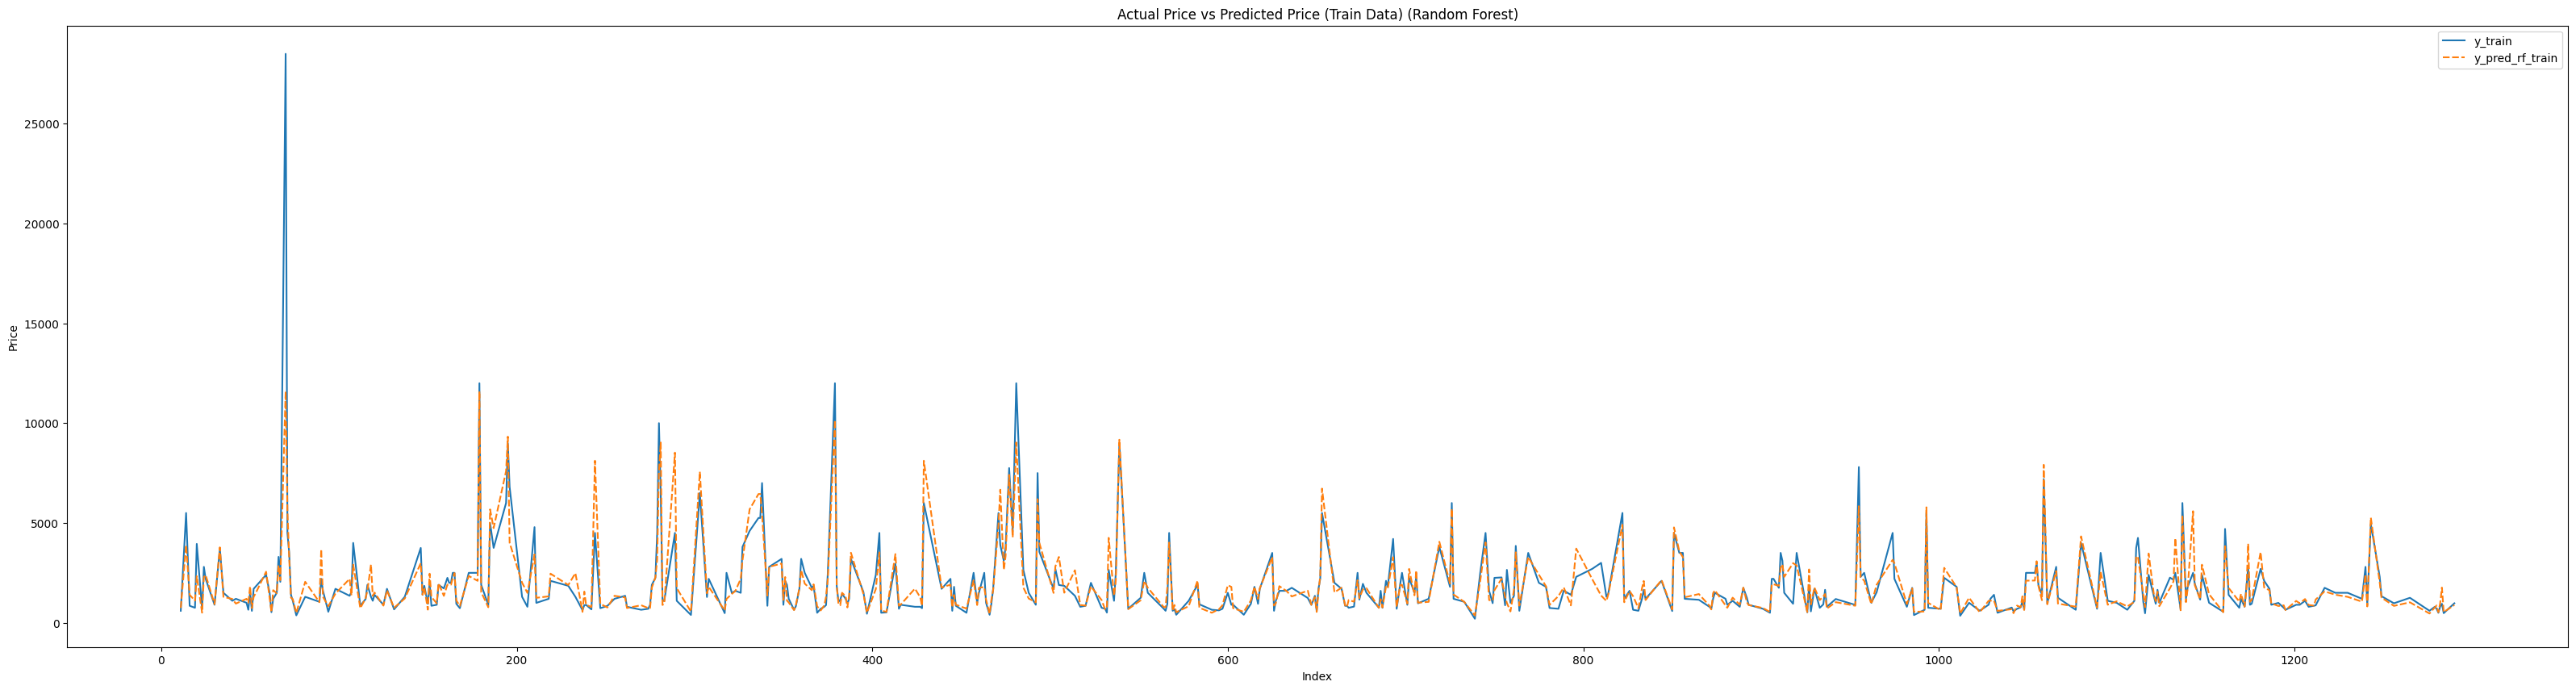

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


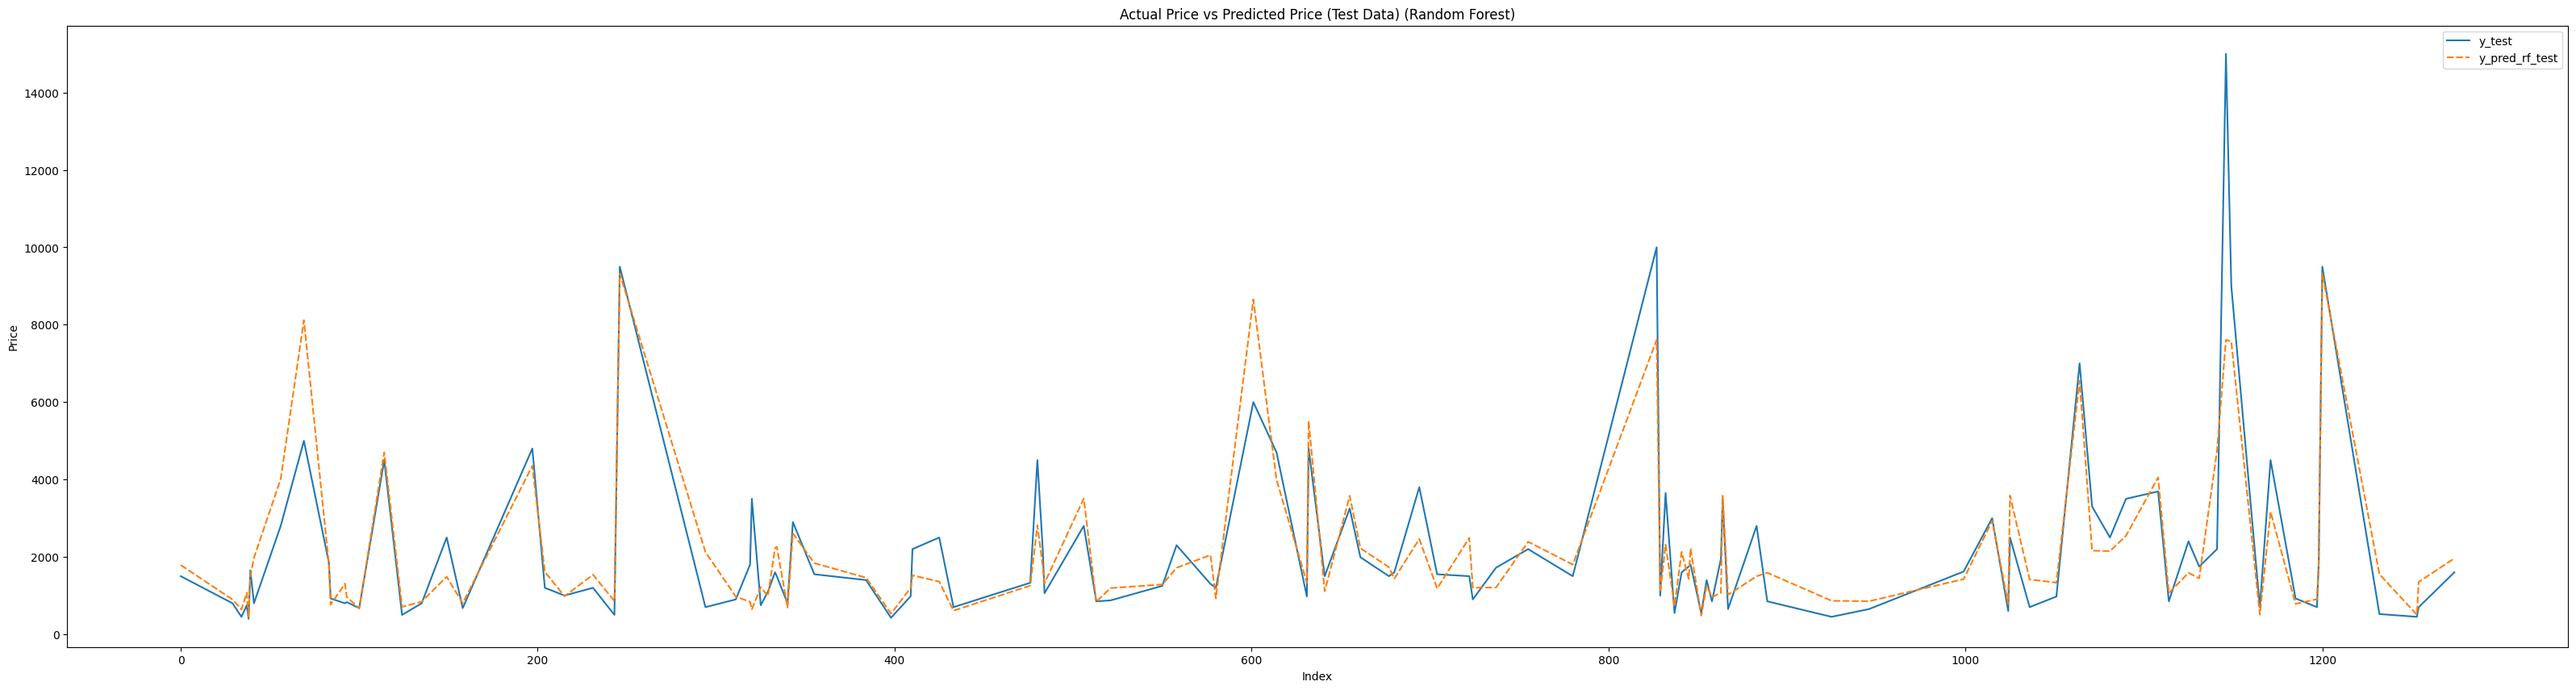

In [157]:
# visualize the y_train and y_train_pred to line chart

plt.figure(figsize=(40,10))
sns.lineplot(data=pd.DataFrame({'y_train':y_train, 'y_pred_rf_train':y_pred_lgbm_train}))
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price (Train Data) (Random Forest)')
plt.show()

# visualize the y_test and y_test_pred

plt.figure(figsize=(40,10))
sns.lineplot(data=pd.DataFrame({'y_test':y_test, 'y_pred_rf_test':y_pred_lgbm_test}))
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price (Test Data) (Random Forest)')
plt.show()



## Param Tuning

### Random Forest Hyperparameter Tuning

In [158]:
##Parameter Tuning

param_rf = {
    'n_estimators': [10, 25, 50, 75, 100],  
    'max_depth': [5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [159]:
# grid_rf = GridSearchCV(RandomForestRegressor(), param_rf, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')

# # Fit the GridSearchCV object with data
# grid_rf.fit(X_train_transformed, y_train)

In [160]:
# grid_rf.best_params_

In [161]:
# use best parameters
model_rf_tuned = RandomForestRegressor(
    n_estimators=500,
    max_depth=9,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    bootstrap =True,
    warm_start = False,
    max_features = 90
)

# fit the model
model_rf_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_rf_tuned_train = model_rf_tuned.predict(X_train_transformed)
y_pred_rf_tuned_test = model_rf_tuned.predict(X_test_transformed)

# compile all result in a dataframe

results_rf_tuned = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest Tuned'],
    'Training Score': [model_rf.score(X_train_transformed, y_train), model_rf_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_rf.score(X_test_transformed, y_test), model_rf_tuned.score(X_test_transformed, y_test)],
   })

results_rf_tuned


,Model,Training Score,Testing Score
0,Random Forest,0.956734,0.791515
1,Random Forest Tuned,0.944497,0.796921


### LightGBM Hyperparameter Tuning

In [162]:
param_lgbm = {
    'num_leaves': [20, 30, 40, 50],  
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

In [163]:
# grid_lgbm = GridSearchCV(LGBMRegressor(), param_lgbm, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')

# # Fit the GridSearchCV object with data
# grid_lgbm.fit(X_train_transformed, y_train)

In [164]:
# grid_lgbm.best_params_

In [165]:
# use best parameters
model_lgbm_tuned = LGBMRegressor(
    num_leaves=30,
    n_estimators=500,
    max_depth=9,
    learning_rate=0.1
)

# fit the model
model_lgbm_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_lgbm_tuned_train = model_lgbm_tuned.predict(X_train_transformed)
y_pred_lgbm_tuned_test = model_lgbm_tuned.predict(X_test_transformed)

# compile all result in a dataframe
results_lgbm_tuned = pd.DataFrame({
    'Model': ['LightGBM', 'LightGBM Tuned'],
    'Training Score': [model_lgbm.score(X_train_transformed, y_train), model_lgbm_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_lgbm.score(X_test_transformed, y_test), model_lgbm_tuned.score(X_test_transformed, y_test)],
   })
results_lgbm_tuned

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 451, number of used features: 11
[LightGBM] [Info] Start training from score 1974.046563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

,Model,Training Score,Testing Score
0,LightGBM,0.767333,0.779041
1,LightGBM Tuned,0.871989,0.747275


### XGBoost Hyperparameter Tuning

In [166]:
param_xgb = {
    'n_estimators': [100, 200, 300, 400],  
    'max_depth': [5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

In [167]:
# grid_xgb = GridSearchCV(XGBRegressor(), param_xgb, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')

# # Fit the GridSearchCV object with data
# grid_xgb.fit(X_train_transformed, y_train)

In [168]:
# grid_xgb.best_params_

In [169]:
# use best parameters
model_xgb_tuned = XGBRegressor(
    
    reg_lambda = 0.072,
    reg_alpha = 0.8,
    n_estimators=110,
    max_depth=3,
    learning_rate=0.1,
    subsample = 0.911,
    random_state = 12,
    eval_metric = 'auc'
    
)

# fit the model
model_xgb_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_xgb_tuned_train = model_xgb_tuned.predict(X_train_transformed)
y_pred_xgb_tuned_test = model_xgb_tuned.predict(X_test_transformed)

# compile all result in a dataframe
results_xgb_tuned = pd.DataFrame({
    'Model': ['XGBoost', 'XGBoost Tuned'],
    'Training Score': [model_xgb.score(X_train_transformed, y_train), model_xgb_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_xgb.score(X_test_transformed, y_test), model_xgb_tuned.score(X_test_transformed, y_test)],
   })
results_xgb_tuned

,Model,Training Score,Testing Score
0,XGBoost,0.999658,0.773585
1,XGBoost Tuned,0.960242,0.798044


### Decision Tree Hyperparamter Tunning

In [170]:
# use best parameters
model_dt_tuned = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

# fit the tuned model
model_dt_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_dt_tuned_train = model_dt_tuned.predict(X_train_transformed)
y_pred_dt_tuned_test = model_dt_tuned.predict(X_test_transformed)

# compile all results in a dataframe
results_dt_tuned = pd.DataFrame({
    'Model': ['Decision Tree', 'Decision Tree Tuned'],
    'Training Score': [model_dt.score(X_train_transformed, y_train), model_dt_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_dt.score(X_test_transformed, y_test), model_dt_tuned.score(X_test_transformed, y_test)],
})

# Print the results
results_dt_tuned

,Model,Training Score,Testing Score
0,Decision Tree,0.914401,0.817913
1,Decision Tree Tuned,0.825916,0.730448


### Lasso Regression Hyper Parameter Tunning

In [171]:
# use best parameters
model_lasso_tuned = Lasso(
    alpha=34,         # Regularization parameter
    fit_intercept=True, # Fit the intercept or not
    random_state=42    # Seed for reproducibility
)

# fit the tuned model
model_lasso_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_lasso_tuned_train = model_lasso_tuned.predict(X_train_transformed)
y_pred_lasso_tuned_test = model_lasso_tuned.predict(X_test_transformed)

# compile all results in a dataframe
results_lasso_tuned = pd.DataFrame({
    'Model': ['Lasso Regression', 'Lasso Regression Tuned'],
    'Training Score': [model_lasso.score(X_train_transformed, y_train), model_lasso_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_lasso.score(X_test_transformed, y_test), model_lasso_tuned.score(X_test_transformed, y_test)],
})

# Print the results
results_lasso_tuned

,Model,Training Score,Testing Score
0,Lasso Regression,0.808183,0.772062
1,Lasso Regression Tuned,0.805268,0.765272


### Gradient Boosting Regression

In [172]:
# use best parameters
model_gbr_tuned = GradientBoostingRegressor(
    loss='huber',           # Loss function to be optimized ('ls' for least squares regression)
    learning_rate=0.1,    # Step size shrinkage used to prevent overfitting
    n_estimators=110,     # Number of boosting stages to be run
    max_depth=3,          # Maximum depth of the individual trees
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
    subsample=0.911,        # Fraction of samples used for fitting the trees
    random_state=42,
    max_features = 'log2',
)

# fit the tuned model
model_gbr_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_gbr_tuned_train = model_gbr_tuned.predict(X_train_transformed)
y_pred_gbr_tuned_test = model_gbr_tuned.predict(X_test_transformed)

# compile all results in a dataframe
results_lasso_tuned = pd.DataFrame({
    'Model': ['Gradient Boosting Regressor', 'Gradient Boosting Regressor Tuned'],
    'Training Score': [model_gbr.score(X_train_transformed, y_train), model_gbr_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_gbr.score(X_test_transformed, y_test), model_gbr_tuned.score(X_test_transformed, y_test)],
})

# Print the results
results_lasso_tuned

,Model,Training Score,Testing Score
0,Gradient Boosting Regressor,0.946038,0.779613
1,Gradient Boosting Regressor Tuned,0.934043,0.795118


## EDA for checking on the missprediction

In [173]:
# check for missprediction with more than 30% error in random forest

miss_pred_rf = X_test.copy()
miss_pred_rf['actual'] = y_test
miss_pred_rf['predicted'] = y_pred_rf_test
miss_pred_rf['error'] = abs(miss_pred_rf['actual'] - miss_pred_rf['predicted'])
miss_pred_rf['error_percentage'] = (miss_pred_rf['error'] / miss_pred_rf['actual']) * 100

miss_pred_rf[miss_pred_rf['error_percentage'] > 30]

,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Kondisi Perabotan,actual,predicted,error,error_percentage
34,Balikpapan Selatan,2.0,1.0,105,50,SHM - Sertifikat Hak Milik,1300,NaN,450.0,652.191667,202.191667,44.931481
722,Balikpapan Selatan,4.0,3.0,165,200,SHM - Sertifikat Hak Milik,5500,Unknown,1500.0,2533.200000,1033.200000,68.880000
56,Balikpapan Selatan,4.0,3.0,354,225,SHM - Sertifikat Hak Milik,4400,Unknown,2800.0,3711.900000,911.900000,32.567857
409,Balikpapan Selatan,3.0,2.0,75,70,HGB - Hak Guna Bangunan,2200,Furnished,983.0,1418.010000,435.010000,44.253306
38,Balikpapan Selatan,2.0,1.0,72,56,SHM - Sertifikat Hak Milik,1300,Unfurnished,400.0,555.075000,155.075000,38.768750
680,Balikpapan Selatan,3.0,2.0,171,93,SHM - Sertifikat Hak Milik,1300,Unknown,1600.0,1064.965476,535.034524,33.439658
867,Balikpapan Selatan,3.0,2.0,72,54,SHM - Sertifikat Hak Milik,4400,Unknown,650.0,1061.775238,411.775238,63.350037
694,Balikpapan Selatan,5.0,3.0,135,234,SHM - Sertifikat Hak Milik,1300,Unknown,3800.0,2095.400000,1704.600000,44.857895
1149,Balikpapan Selatan,4.0,4.0,570,300,SHM - Sertifikat Hak Milik,13200,Unknown,9000.0,5573.000000,3427.000000,38.077778
1125,Balikpapan Selatan,3.0,2.0,277,180,SHM - Sertifikat Hak Milik,2200,Unfurnished,2400.0,1546.850000,853.150000,35.547917


In [174]:
# count by area
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Lokasi'].value_counts()

Lokasi
Balikpapan Selatan    36
Name: count, dtype: int64

In [175]:
# count by Kamar Tidur
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Kamar Tidur'].value_counts()

Kamar Tidur
3.0     16
2.0     10
4.0      7
5.0      2
13.0     1
Name: count, dtype: int64

In [176]:
# count by Kamar Mandi
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Kamar Mandi'].value_counts()

Kamar Mandi
2.0    12
1.0    11
3.0    10
4.0     2
5.0     1
Name: count, dtype: int64

In [177]:
# count by Luas Tanah
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Luas Tanah'].value_counts()

Luas Tanah
72     3
150    3
180    2
165    2
120    2
105    1
216    1
143    1
90     1
136    1
126    1
94     1
162    1
147    1
193    1
102    1
827    1
215    1
200    1
399    1
241    1
164    1
277    1
570    1
135    1
171    1
75     1
354    1
374    1
Name: count, dtype: int64

In [178]:
# count by Luas Bangunan
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Luas Bangunan'].value_counts()

Luas Bangunan
150    4
180    3
50     2
200    2
120    2
93     1
136    1
130    1
60     1
49     1
74     1
92     1
230    1
210    1
65     1
45     1
225    1
54     1
600    1
70     1
160    1
288    1
316    1
173    1
56     1
300    1
234    1
220    1
Name: count, dtype: int64

In [179]:
# count by Daya Listrik
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Daya Listrik'].value_counts()

Daya Listrik
1300     11
2200     11
4400      6
5500      2
900       2
3500      2
13200     1
6600      1
Name: count, dtype: int64

In [180]:
# count by Sertifikat
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Sertifikat'].value_counts()

Sertifikat
SHM - Sertifikat Hak Milik    29
HGB - Hak Guna Bangunan        7
Name: count, dtype: int64